In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

In [12]:
data = pd.read_csv("Churn1.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [20]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
# GEREKSİZ SÜTUNU KONTROLLE SİL
#if "customerID" in data.columns:
    #data = data.drop(["customerID"], axis=1)

# Kategorik verileri sayısallaştırma
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == object:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

# Özellikler ve hedef değişkeni ayırma
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Veriyi eğitim ve test setine ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
#Veriyi Ölçeklendirme
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Model Oluşturma**

In [23]:
model = models.Sequential()
model.add(layers.Dense(16,activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#Model derleme

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Model Egitme**


In [26]:
history=model.fit(X_train, y_train, epochs=50, batch_size=32,
                  validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6266 - loss: 0.6301 - val_accuracy: 0.7764 - val_loss: 0.4690
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7802 - loss: 0.4621 - val_accuracy: 0.7924 - val_loss: 0.4337
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.4479 - val_accuracy: 0.7959 - val_loss: 0.4223
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.4315 - val_accuracy: 0.7959 - val_loss: 0.4203
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8020 - loss: 0.4277 - val_accuracy: 0.7924 - val_loss: 0.4167
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8072 - loss: 0.4171 - val_accuracy: 0.7915 - val_loss: 0.4157
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7881 - loss: 0.4322 - val_accuracy: 0.7986 - val_loss: 0.4144
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8123 - loss: 0.4082 - val_accuracy: 0.

In [27]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f"Test Doğruluğu:{test_acc}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8079 - loss: 0.4142
Test Doğruluğu:0.802696943283081


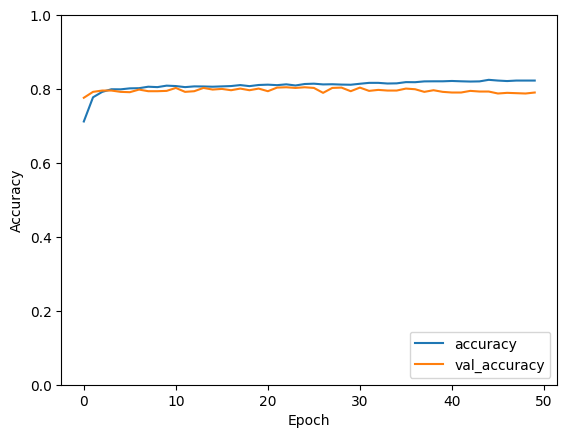

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label ="accuracy")
plt.plot(history.history["val_accuracy"], label= "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0,1])
plt.legend(loc="lower right")
plt.show()